In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
np.random.seed(0)

# Load your temperature dataset with columns "Date" and "Temperature"
data = pd.read_csv('AirPassengers.csv')

# Make sure your "Date" column is in datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Sorting the data by date (if not sorted)
data = data.sort_values(by='Month')

# Resetting the index
# data.set_index('Month', inplace=True)

# data.dropna(inplace=True)


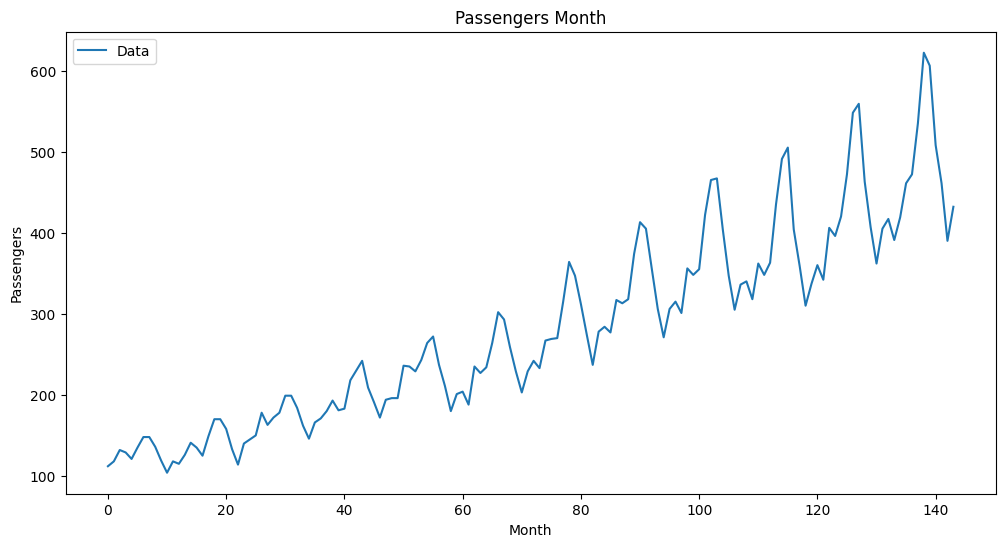

In [77]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( data['#Passengers'], label='Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('Passengers Month')
plt.show()


In [78]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	data[f'Lag_{i}'] = data['#Passengers'].shift(i)

# Drop rows with NaN values resulting from creating lag features
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']


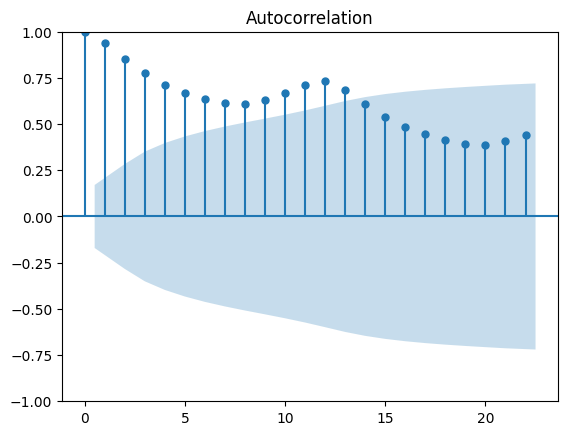

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
series = data['#Passengers']
plot_acf(series)
plt.show()


In [80]:
data['#Passengers'].corr(data['#Passengers'].shift(1))

0.9534698127349908

In [81]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [82]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)
 
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 21.29
Root Mean Squared Error: 27.12


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [83]:
data

,Month,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
12,1950-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
13,1950-02-01,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
14,1950-03-01,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
15,1950-04-01,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
16,1950-05-01,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
140,1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
141,1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
142,1960-11-01,390,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0


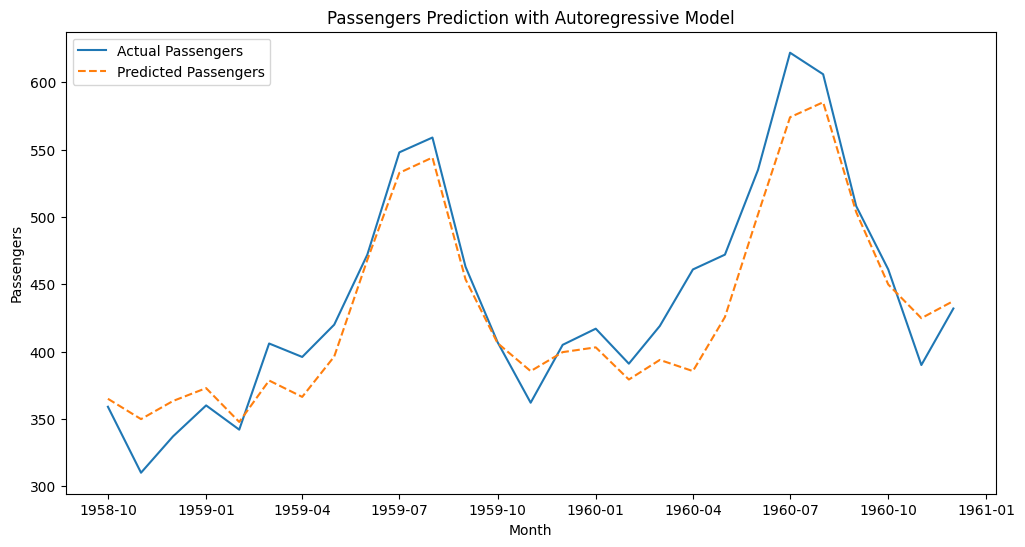

In [84]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data["Month"] ,y_test, label='Actual Passengers')
plt.plot( test_data["Month"],y_pred, label='Predicted Passengers', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('Passengers Prediction with Autoregressive Model')
plt.show()


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


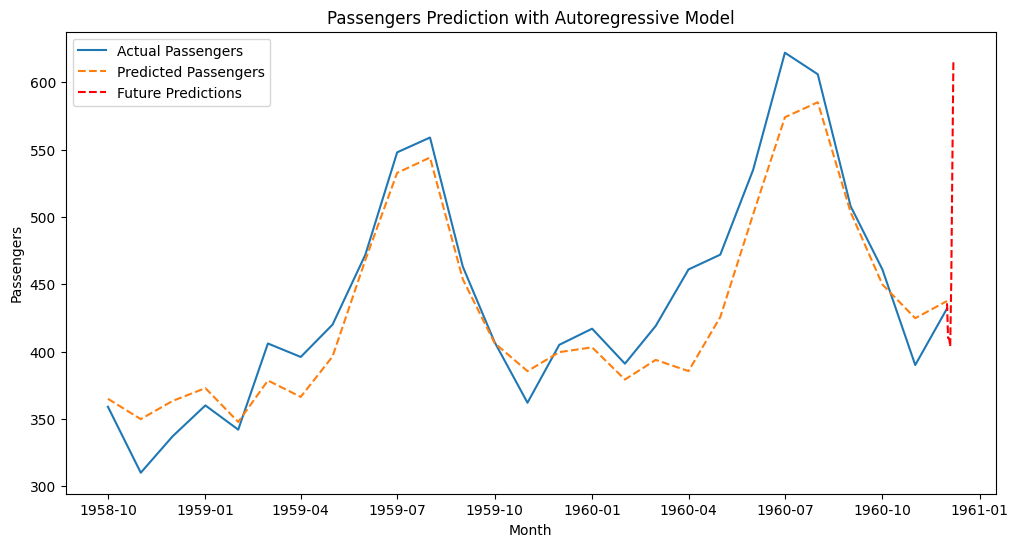

In [85]:
# Define the number of future time steps you want to predict (1 week)
forecast_steps = 7
 
# Extend the predictions into the future for one year
future_indices = range(len(test_data), len(test_data) + forecast_steps)
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) + forecast_steps - 1, dynamic=False)
 
# Create date indices for the future predictions
future_dates = pd.date_range(start=test_data['Month'].iloc[-1], periods=forecast_steps, freq='D')
 
# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data['Month'], y_test, label='Actual Passengers')
plt.plot(test_data['Month'], y_pred, label='Predicted Passengers', linestyle='--')
plt.plot(future_dates, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('Passengers Prediction with Autoregressive Model')
plt.show()